In [9]:
#No69( t-SNEによる可視化)
from gensim.models import keyedvectors
import pickle
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

model = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz", binary=True)

#No67の利用
countries = []
countries_name = []
vec_countries = []
with open('/content/drive/MyDrive/countries_name.csv', 'r', encoding='utf-8_sig') as f:
    for line in f:
      # 改行を削除
        country = line.rstrip()
        #リストに追加
        countries.append(country)
 # ヘッダの削除(指定した値を削除できる.また削除した値を取得できる)
countries.pop(0)

# モデルに含まれる国名のみを抽出(try except でも可)
for country in countries:
    if country in model:
        countries_name.append(country)
        vec_countries.append(model[country])  # 単語ベクトルの取得

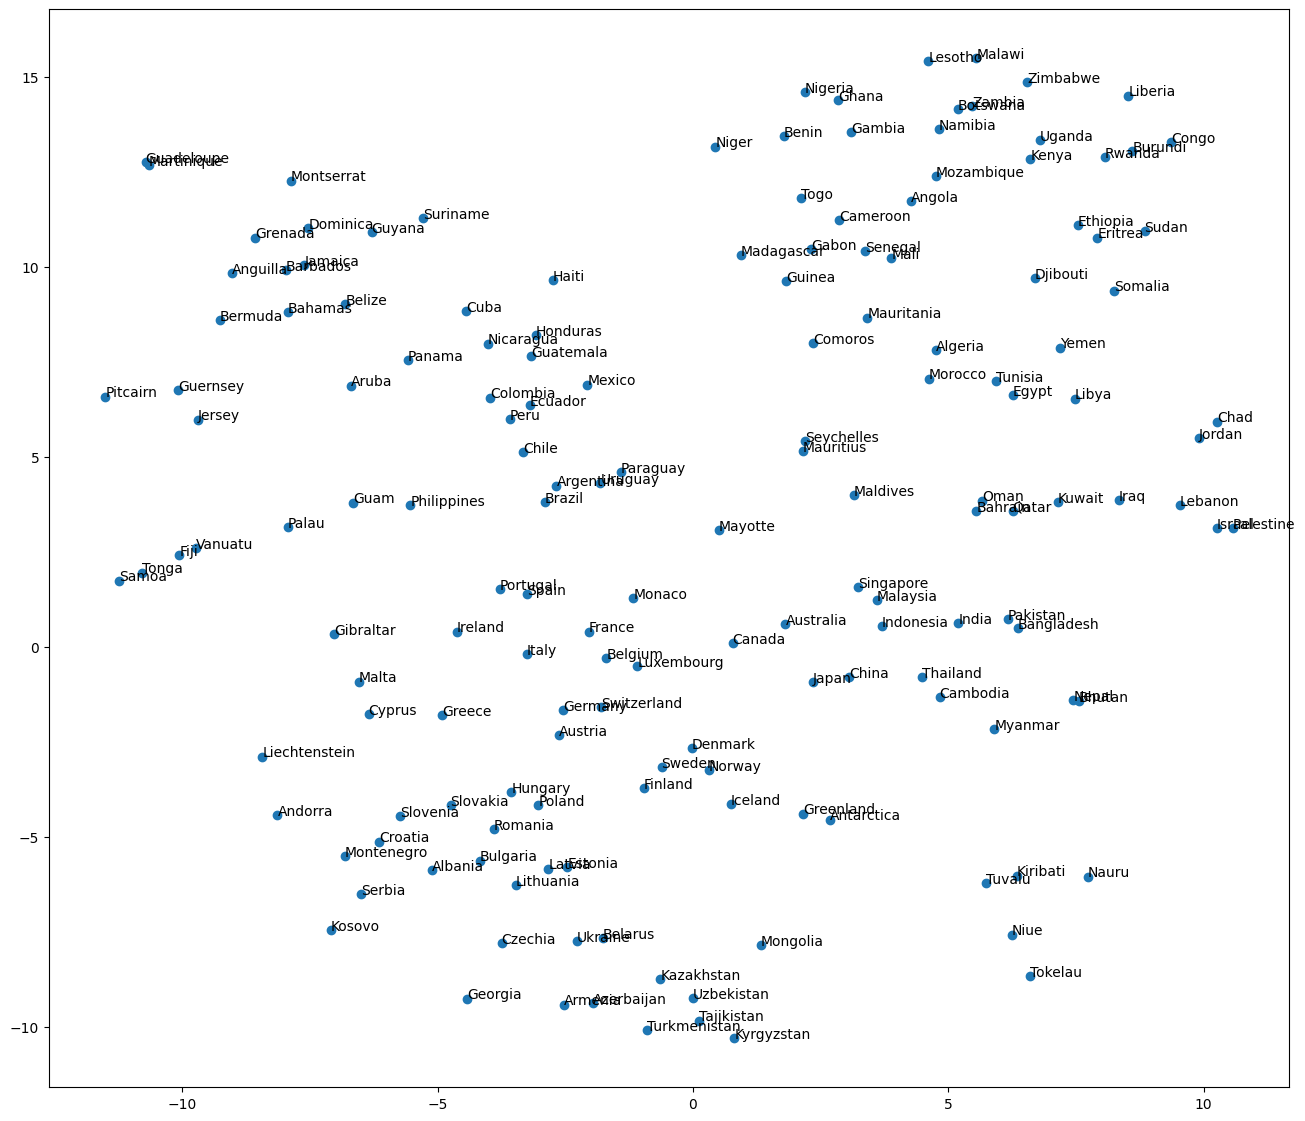

In [10]:
#t-SNE:機械学習の教師なし学習の中のひとつで、次元削減を行うアルゴリズム
#PCAなどの可視化手法とは異なり、線形では表現できない関係も学習して次元削減を行える利点がある
from sklearn.manifold import TSNE
import numpy as np
#次元を2次元にする
tsne = TSNE(n_components=2, random_state=42)
vec_countries=np.array(vec_countries)
vec_embedded = tsne.fit_transform(vec_countries)

#行と列を入れ替える(転置)
vec_embedded = np.array(vec_embedded).T
fig, ax = plt.subplots(figsize=(16, 14))
# scatter  散布図などに利用できる
plt.scatter(vec_embedded[0], vec_embedded[1])
#番号と要素を抽出する。
for i, country in enumerate(countries_name):
  # plt.annotate 図に注釈を入れる(注釈を付ける点とテキストを表示する点を指定する)
    ax.annotate(country, (vec_embedded[0][i], vec_embedded[1][i]))
plt.show()